***Цель проекта:*** Рассмотреть зависимость ВВП и уровня инфляции от степени занятости населения на примере 5 восточноевропейских стран: Польши, Чехии, Венгрии, Румынии и Болгарии.

Эти страны относительно недавно перешли в условия рыночной экономики, а также их экономические показатели более независимы от общеевропеских тенденций, так как они используют свою национальную валюту вместо евро.

***Наша основная гипотеза:*** Уровень безработицы имеет отрицательное влияние на ВВП и уровень инфляции

In [ ]:
import requests #Библиотека, позволяющая подключаться к сайтам
import pandas as pd
from bs4 import BeautifulSoup #Библиотека для парсинга сайта
from io import BytesIO #библиотека для чтения данных
import matplotlib.pyplot as plt
from matplotlib import ticker #Модуль для форматирования визуализации

# ***ВАЛОВЫЙ ВНУТРЕННИЙ ПРОДУКТ***





In [ ]:
#Подключаемся к сайту Мирового Банка, чтобы выгрузить excel таблицу с данными
GDP = 'https://data.worldbank.org/indicator/NY.GDP.MKTP.CD'
page = requests.get(GDP)
soup = BeautifulSoup(page.text, "html.parser")
GDP_file = soup.find_all('div', class_='btn-item download')
GDP = GDP_file[0].find_all('a')
GDP = GDP[-1].get('href')
url = f'{GDP}'
response = requests.get(url)
#Создаем датафрейм на основе выгруженной таблицы, форматируем датафрем
#так как в изначальной таблице первые 3 строчки - пустые либо заполнены информацией об организации
#названия столбцов находятся на 3 строке, а данные начинаются с 4
df = pd.read_excel(BytesIO(response.content))
df.columns = df.iloc[2]
df = df.drop([0, 1, 2])
#Изменяем вид отображения названий столбцов, чтобы год имел тип данных int
#Иначе в таблце название будет представлено, например, как 1960.0
skip_cols = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
for col in df.columns:
    if col not in skip_cols:
        df.rename(columns={col: int(float(col))}, inplace=True)
pd.options.display.float_format ='{:,.0f}'.format
df.columns.name = None
#Обнуляем индексы из-за предыдущих махинаций, выводим датафрейм
df.index = range(0, len(df), 1)
GDP_df = df
GDP_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,"2,790,849,721","2,962,907,263","2,983,635,196","3,092,429,050","3,276,184,358","3,395,798,883","2,558,906,304","3,103,184,102","3,544,707,788",NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,"18,478,095,142","19,366,314,294","20,506,467,178","22,242,734,491","24,294,329,780","26,619,560,807",...,"1,006,992,481,354","932,513,471,557","890,051,427,266","1,028,394,291,261","1,012,521,425,296","1,006,191,000,190","928,880,235,177","1,086,530,704,901","1,185,137,703,651",NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,"537,777,811","548,888,896","546,666,678","751,111,191","800,000,044","1,006,666,638",...,"20,497,128,600","19,134,221,745","18,116,572,399","18,753,456,507","18,053,222,735","18,799,444,415","19,955,929,061","14,266,499,430",NaN,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,"10,411,646,287","11,135,924,728","11,951,712,282","12,685,805,890","13,848,998,669","14,874,755,834",...,"894,505,003,403","769,263,195,357","692,114,931,613","685,630,289,667","768,158,194,632","823,405,580,188","786,962,436,538","844,927,536,438","875,393,693,658",NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,"135,966,802,157","90,496,420,626","52,761,617,226","73,690,155,047","79,450,688,232","70,897,962,713","48,501,561,230","66,505,129,989","106,782,770,715",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,"7,074,394,735","6,295,848,423","6,682,677,290","7,180,764,703","7,878,759,715","7,899,737,577","7,717,145,218","9,412,034,299","9,409,473,518",NaN
262,"Yemen, Rep.",YEM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,"43,228,585,321","42,444,489,522","31,317,824,943","26,842,228,829","21,606,160,784",NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,GDP (current US$),NY.GDP.MKTP.CD,"8,748,596,501","9,225,996,310","9,813,996,074","10,854,195,658","11,955,995,218","13,068,994,772",...,"381,198,869,776","346,709,790,459","323,585,509,674","381,448,814,655","405,260,723,893","389,330,032,221","338,291,396,026","420,117,812,464","405,270,850,099",NaN
264,Zambia,ZMB,GDP (current US$),NY.GDP.MKTP.CD,"713,000,000","696,285,714","693,142,857","718,714,286","839,428,571","1,082,857,143",...,"27,141,023,558","21,251,216,799","20,958,412,538","25,873,601,261","26,311,507,274","23,308,667,781","18,110,638,269","22,096,416,934","29,163,782,138",NaN


In [ ]:
#Создаем списки значений, которые нам нужны, а именно выбранные страны и отрезок времени
countries = [GDP_df[GDP_df['Country Name'] == 'Bulgaria'].index[0], GDP_df[GDP_df['Country Name'] == 'Poland'].index[0], GDP_df[GDP_df['Country Name'] == 'Czechia'].index[0], GDP_df[GDP_df['Country Name'] == 'Hungary'].index[0], GDP_df[GDP_df['Country Name'] == 'Romania'].index[0]]
columns = ['Country Name']
for i in range(1999,2023):
  columns.append(i)

In [ ]:
#Создаем новый датафрейм, в котором содержатся только нужные нам данные
#Добавляем новые столбцы - процентное изменение ВВП
sorted_df = GDP_df.loc[countries, columns]
sorted_df.index = range(0, len(sorted_df), 1)
x = sorted_df.T
x.columns = x.iloc[0]
x['Year'] = x.index
x.index = range(0,len(x), 1)
x = x[['Year', 'Bulgaria', 'Poland', 'Czechia', 'Hungary', 'Romania']]
x = x.drop([0])
x.index = range(0,len(x), 1)
x.columns.name = None
x['Bul_Percent'] = x['Bulgaria'].pct_change()*100
x['Pol_Percent'] = x['Poland'].pct_change()*100
x['Cze_Percent'] = x['Czechia'].pct_change()*100
x['Hun_Percent'] = x['Hungary'].pct_change()*100
x['Rom_Percent'] = x['Romania'].pct_change()*100
x

,Year,Bulgaria,Poland,Czechia,Hungary,Romania,Bul_Percent,Pol_Percent,Cze_Percent,Hun_Percent,Rom_Percent
0,1999,"13,627,325,461","170,030,662,135","65,173,130,995","49,073,380,174","35,953,156,754",NaN,NaN,NaN,NaN,NaN
1,2000,"13,245,990,274","172,220,451,787","61,828,166,496","47,218,405,892","37,253,739,511",-3,1,-5,-4,4
2,2001,"14,183,446,026","190,905,493,539","67,808,032,980","53,749,989,092","40,395,116,581",7,11,10,14,8
3,2002,"16,403,043,850","199,070,448,695","82,196,001,051","67,608,919,144","46,065,502,703",16,4,21,26,14
4,2003,"21,144,957,990","217,828,661,057","100,090,467,581","85,285,062,818","57,806,384,143",29,9,22,26,25
5,2004,"26,157,743,369","255,107,252,159","119,814,434,354","104,120,820,259","74,973,656,852",24,17,20,22,30
6,2005,"29,868,657,858","306,145,944,825","137,143,471,328","113,211,158,293","98,454,380,120",14,20,14,9,31
7,2006,"34,380,536,496","344,626,667,414","156,264,095,665","115,715,618,613","122,023,735,993",15,13,14,2,24
8,2007,"44,432,811,756","429,020,755,433","190,183,800,884","140,186,716,681","174,588,782,939",29,24,22,21,43
9,2008,"54,480,684,188","533,599,779,516","236,816,485,763","158,325,614,581","214,317,202,478",23,24,25,13,23


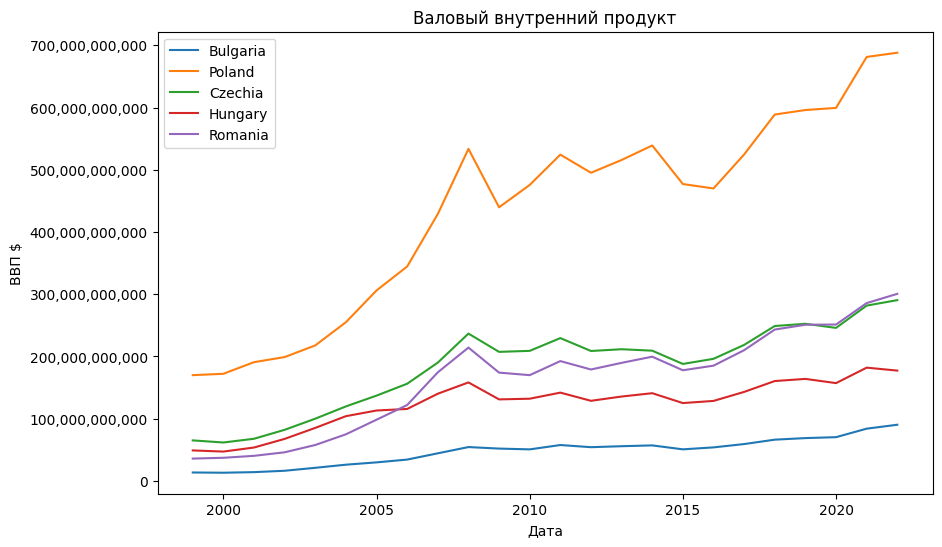

In [ ]:
#Выводим визуализацию
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x['Year'], x['Bulgaria'], label='Bulgaria')
ax.plot(x['Year'], x['Poland'], label='Poland')
ax.plot(x['Year'], x['Czechia'], label='Czechia')
ax.plot(x['Year'], x['Hungary'], label='Hungary')
ax.plot(x['Year'], x['Romania'], label='Romania')
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
ax.yaxis.set_major_formatter(formatter)
ax.set_xlabel('Дата')
ax.set_ylabel('ВВП $')
ax.set_title('Валовый внутренний продукт')
ax.legend()
plt.show()

In [ ]:
#Остальные данные были получены, отформатированы и выведены аналогично

# ***ИНФЛЯЦИЯ***

In [ ]:
Inflation = 'https://data.worldbank.org/indicator/FP.CPI.TOTL.ZG'
page = requests.get(Inflation)
soup = BeautifulSoup(page.text, "html.parser")
Inflation_file = soup.find_all('div', class_='btn-item download')
Inflation = Inflation_file[0].find_all('a')
Inflation = Inflation[-1].get('href')
url = f'{Inflation}'
response = requests.get(url)
df1 = pd.read_excel(BytesIO(response.content))
df1.columns = df1.iloc[2]
df1 = df1.drop([0, 1, 2])
skip_cols = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
for col in df1.columns:
    if col not in skip_cols:
        df1.rename(columns={col: int(float(col))}, inplace=True)
pd.options.display.float_format ='{:,.0f}'.format
df1.columns.name = None
df1.index = range(0, len(df1), 1)
Inflation_df = df1
Inflation_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,-1,-1,4,4,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,5,5,7,6,5,5,7,7,11,NaN
2,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,5,-1,4,5,1,2,NaN,NaN,NaN,NaN
3,Africa Western and Central,AFW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2,2,1,2,2,2,2,4,8,NaN
4,Angola,AGO,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,7,9,31,30,20,17,22,26,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,0,-1,0,1,1,3,0,3,12,NaN
262,"Yemen, Rep.",YEM,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,1,2,1,1,3,4,...,6,5,7,5,5,4,3,5,7,NaN
264,Zambia,ZMB,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,8,10,18,7,7,9,16,22,11,NaN


In [ ]:
sorted_df = Inflation_df.loc[countries, columns]
sorted_df.index = range(0, len(sorted_df), 1)
x = sorted_df.T
x.columns = x.iloc[0]
x['Year'] = x.index
x.index = range(0,len(x), 1)
x = x[['Year', 'Bulgaria', 'Poland', 'Czechia', 'Hungary', 'Romania']]
x = x.drop([0])
x.index = range(0,len(x), 1)
x.columns.name = None
x['Bul_Diff'] = x['Bulgaria'].diff()
x['Pol_Diff'] = x['Poland'].diff()
x['Cze_Diff'] = x['Czechia'].diff()
x['Hun_Diff'] = x['Hungary'].diff()
x['Rom_Diff'] = x['Romania'].diff()
x

,Year,Bulgaria,Poland,Czechia,Hungary,Romania,Bul_Diff,Pol_Diff,Cze_Diff,Hun_Diff,Rom_Diff
0,1999,3,7,2,10,46,NaN,NaN,NaN,NaN,NaN
1,2000,10,10,4,10,46,8,3,2,-0,-0
2,2001,7,5,5,9,34,-3,-4,1,-1,-11
3,2002,6,2,2,5,23,-2,-4,-3,-4,-12
4,2003,2,1,0,5,15,-3,-1,-2,-1,-7
5,2004,6,3,3,7,12,4,3,3,2,-3
6,2005,5,2,2,4,9,-1,-1,-1,-3,-3
7,2006,7,1,3,4,7,2,-1,1,0,-2
8,2007,8,2,3,8,5,1,1,0,4,-2
9,2008,12,4,6,6,8,4,2,4,-2,3


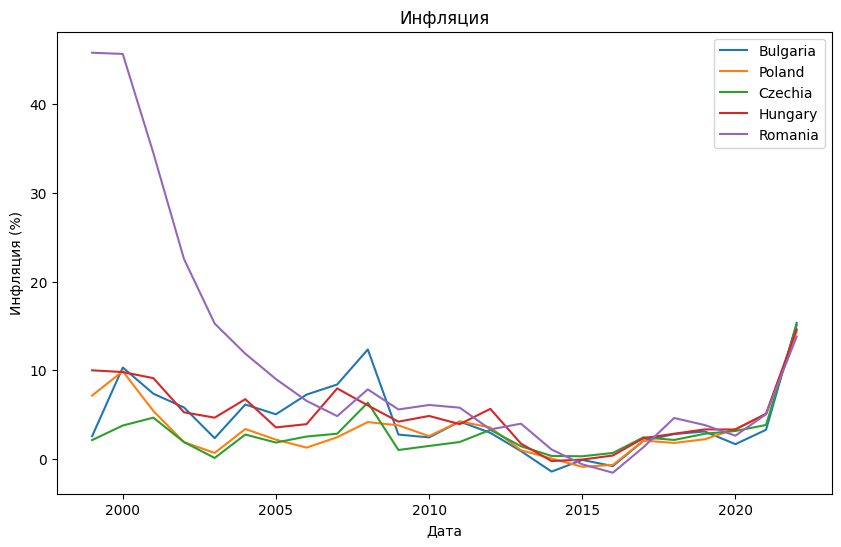

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x['Year'], x['Bulgaria'], label='Bulgaria')
ax.plot(x['Year'], x['Poland'], label='Poland')
ax.plot(x['Year'], x['Czechia'], label='Czechia')
ax.plot(x['Year'], x['Hungary'], label='Hungary')
ax.plot(x['Year'], x['Romania'], label='Romania')
ax.set_xlabel('Дата')
ax.set_ylabel('Инфляция (%)')
ax.set_title('Инфляция')
ax.legend()
plt.show()

# ***БЕЗРАБОТИЦА***

In [ ]:
Unemployment = 'https://data.worldbank.org/indicator/SL.UEM.TOTL.NE.ZS'
page = requests.get(Unemployment)
soup = BeautifulSoup(page.text, "html.parser")
Unemployment_file = soup.find_all('div', class_='btn-item download')
Unemployment = Unemployment_file[0].find_all('a')
Unemployment = Unemployment[-1].get('href')
url = f'{Unemployment}'
response = requests.get(url)
df1 = pd.read_excel(BytesIO(response.content))
df1.columns = df1.iloc[2]
df1 = df1.drop([0, 1, 2])
skip_cols = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']
for col in df1.columns:
    if col not in skip_cols:
        df1.rename(columns={col: int(float(col))}, inplace=True)
pd.options.display.float_format ='{:,.0f}'.format
df1.columns.name = None
df1.index = range(0, len(df1), 1)
Unemployment_df = df1
Unemployment_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Aruba,ABW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8,NaN,NaN,11,NaN,NaN,12,6,NaN,NaN
3,Africa Western and Central,AFW,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,4,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,10,NaN,NaN,NaN,NaN,16,NaN,16,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,35,33,27,30,28,25,25,20,12,NaN
262,"Yemen, Rep.",YEM,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,23,23,24,24,24,26,24,29,29,NaN
264,Zambia,ZMB,"Unemployment, total (% of total labor force) (...",SL.UEM.TOTL.NE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9,5,6,6,5,6,NaN


In [ ]:
sorted_df = Unemployment_df.loc[countries, columns]
sorted_df.index = range(0, len(sorted_df), 1)
x = sorted_df.T
x.columns = x.iloc[0]
x['Year'] = x.index
x.index = range(0,len(x), 1)
x = x[['Year', 'Bulgaria', 'Poland', 'Czechia', 'Hungary', 'Romania']]
x = x.drop([0])
x.index = range(0,len(x), 1)
x.columns.name = None
x['Bul_Diff'] = x['Bulgaria'].diff()
x['Pol_Diff'] = x['Poland'].diff()
x['Cze_Diff'] = x['Czechia'].diff()
x['Hun_Diff'] = x['Hungary'].diff()
x['Rom_Diff'] = x['Romania'].diff()
x

,Year,Bulgaria,Poland,Czechia,Hungary,Romania,Bul_Diff,Pol_Diff,Cze_Diff,Hun_Diff,Rom_Diff
0,1999,14,12,9,7,6,NaN,NaN,NaN,NaN,NaN
1,2000,16,16,9,7,7,2,4,0,-0,1
2,2001,33,18,8,6,7,16,2,-1,-1,-0
3,2002,18,21,7,6,12,-14,3,-1,-0,5
4,2003,14,19,8,6,7,-4,-2,0,0,-5
5,2004,12,19,8,6,8,-2,-0,1,0,1
6,2005,10,18,8,7,7,-2,-1,-0,1,-1
7,2006,9,14,7,7,7,-1,-4,-1,0,0
8,2007,7,10,5,7,6,-2,-4,-2,-0,-1
9,2008,6,7,4,8,6,-1,-2,-1,0,-1


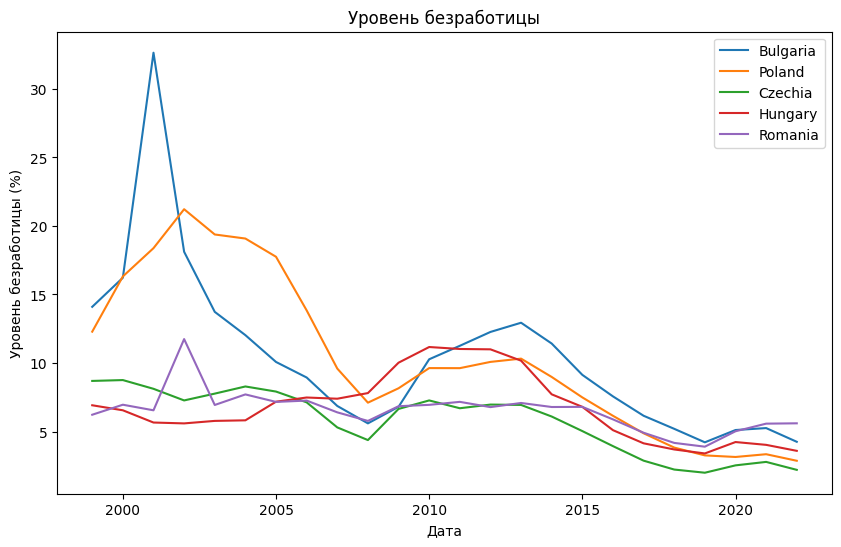

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x['Year'], x['Bulgaria'], label='Bulgaria')
ax.plot(x['Year'], x['Poland'], label='Poland')
ax.plot(x['Year'], x['Czechia'], label='Czechia')
ax.plot(x['Year'], x['Hungary'], label='Hungary')
ax.plot(x['Year'], x['Romania'], label='Romania')
ax.set_xlabel('Дата')
ax.set_ylabel('Уровень безработицы (%)')
ax.set_title('Уровень безработицы')
ax.legend()
plt.show()

# ***ОБУЧЕНИЕ МОДЕЛИ***


Для проверки нашей гипотезы мы будем использовать корреляционный анализ данных. На основании полученных результатов решим, следует ли использовать какие-либо уточняющие методы.

Планируется использование однофакторной регрессионной модели ВВП и для инфляции. Модель будет предсказывать увеличение в процентах. Мы собираемся взять 80% центральных наблюдений,из которых мы исключим выбросы в виде кризисов, чрезмерно быстрого увеличения показателей и т.п. (возможно, уровень данных в обчающей выборке сократится до ≈70% от общего количества).

В процессе построения модели, при необходимости, выборка может быть расширена (назад во времени) для получения наиболее релевантных и точных результатов.
